In [1]:
import pandas as pd
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

data_info = pd.read_csv('/Users/martinli/Desktop/SZ/data.csv')
data_path = '/Users/martinli/Desktop/SZ/GSE109142/' 
#分组
hc_samples_female = data_info[(data_info['Sample_Character_2'] == 'diagnosis: Control') & (data_info['Sample_Character_3'] == 'Sex: Female')]
hc_samples_male = data_info[(data_info['Sample_Character_2'] == 'diagnosis: Control') & (data_info['Sample_Character_3'] == 'Sex: Male')]
uc_samples_female = data_info[(data_info['Sample_Character_2'] == 'diagnosis: Ulcerative Colitis') & (data_info['Sample_Character_3'] == 'Sex: Female')]
uc_samples_male = data_info[(data_info['Sample_Character_2'] == 'diagnosis: Ulcerative Colitis') & (data_info['Sample_Character_3'] == 'Sex: Male')]

# 合并
hc_samples = pd.concat([hc_samples_female, hc_samples_male])
uc_samples = pd.concat([uc_samples_female, uc_samples_male])
print(f"HC samples: {len(hc_samples)}")
print(f"UC samples: {len(uc_samples)}")

# 读取TPM
def read_tpm_file(gsm_id):
    file_pattern = f"{gsm_id}_*.txt"
    matched_files = glob.glob(os.path.join(data_path, file_pattern))
    if not matched_files:
        print(f"No files found for pattern: {file_pattern}")
        return None
    file_path = matched_files[0]  
    df = pd.read_csv(file_path, sep="\t", header=None)
    df.columns = ['Gene', gsm_id]
    df = df.set_index('Gene')
    return df.iloc[1:]

# 合并HC组
hc_samples_data = []
for gsm_id in hc_samples['Sample_geo_accession']:
    sample_data = read_tpm_file(gsm_id)
    if sample_data is not None:
        hc_samples_data.append(sample_data)
    else:
        print(f"Failed to read data for GSM ID: {gsm_id}")

combined_hc_data = pd.concat(hc_samples_data, axis=1)

# 合并UC组
uc_samples_data = []
for gsm_id in uc_samples['Sample_geo_accession']:
    sample_data = read_tpm_file(gsm_id)
    if sample_data is not None:
        uc_samples_data.append(sample_data)
    else:
        print(f"Failed to read data for GSM ID: {gsm_id}")

combined_uc_data = pd.concat(uc_samples_data, axis=1)


# hc_columns = filtered_hc_data.columns
# uc_columns = filtered_uc_data.columns
combined_hc_data.head()
combined_uc_data.head()

HC samples: 20
UC samples: 202


,GSM2932827,GSM2932828,GSM2932829,GSM2932830,GSM2932831,GSM2932832,GSM2932833,GSM2932834,GSM2932835,GSM2932836,...,GSM2933023,GSM2933024,GSM2933025,GSM2933026,GSM2933027,GSM2933028,GSM2933029,GSM2933030,GSM2933031,GSM2933032
Gene,,,,,,,,,,,,,,,,,,,,,
5S,4.1,0.01,19.5061,11.075,9.0493,6.3494,9.5446,6.2058,12.2572,12.2044,...,7.4763,12.0804,11.0748,10.2661,6.4318,2.8788,10.1511,3.4405,4.5914,2.2099
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.94371,0.01,0.01,0.01,0.01,0.01,0.01
7SK,0.32315,0.01,0.20148,0.25827,0.01,0.01,0.01,0.53707,0.61494,0.19615,...,0.01,0.01,0.01,0.01,0.01,0.01,0.44722,0.01,0.24876,0.01
A1BG-AS1,3.0086,1.0436,3.1251,2.6385,1.1207,1.292,2.3796,2.0131,1.4275,1.7678,...,1.7673,1.7756,1.4079,0.99114,1.9296,1.5876,0.78939,1.666,1.3821,1.2347
A1BG,8.0367,3.0496,8.4799,9.1118,4.2544,3.5443,7.3296,6.4649,4.629,5.2866,...,5.3325,7.3282,4.5839,5.7763,7.5666,5.5376,2.8797,6.5167,3.7193,3.0866


In [2]:
import pandas as pd
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

combined_hc_data = pd.read_csv('/Users/martinli/Desktop/SZ/combined_hc_data.csv', index_col=0)
combined_uc_data = pd.read_csv('/Users/martinli/Desktop/SZ/combined_uc_data.csv', index_col=0)
combined_full_data = pd.concat([combined_hc_data, combined_uc_data], axis=1)

/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_25802/1000434228.py:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_hc_data = pd.read_csv('/Users/martinli/Desktop/SZ/combined_hc_data.csv', index_col=0)
/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_25802/1000434228.py:16: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128

In [3]:
i2g = pd.read_csv('/Users/martinli/Desktop/SZ/i2g_df_gene_ppion.csv', index_col=0)
i2g_ppion = i2g[i2g['ppion'] == True]
i2g_initial = i2g[i2g['initial'] == True]
gene_names = set(i2g_initial['gene_name'])
hc_columns = combined_hc_data.columns
uc_columns = combined_uc_data.columns

# 筛选
filtered_hc_data = combined_hc_data.loc[combined_hc_data.index.isin(gene_names)]
filtered_uc_data = combined_uc_data.loc[combined_uc_data.index.isin(gene_names)]
combined_data = pd.concat([filtered_hc_data, filtered_uc_data], axis=1)
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')
combined_data.dropna(axis=0, how='any', inplace=True)
print(combined_data.shape)
print(combined_data.head())
'''
combined_data = pd.concat([combined_hc_data, combined_uc_data], axis=1)
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')
combined_data.dropna(axis=0, how='any', inplace=True)
combined_data.shape
combined_data.head()
'''

(16542, 320)
         GSM2932807  GSM2932808  GSM2932809  GSM2932810  GSM2932811  \
0                                                                     
A1BG         3.2298      7.3417    5.240800    2.555300    1.626500   
A1CF        11.3730     15.5388    6.019300   19.330600   12.206000   
A2ML1        0.1130      0.0100    0.043795    0.011602    0.011105   
A2M         83.9559    121.7395  138.736700   56.322100   33.125700   
A3GALT2      0.0100      0.0100    0.030966    0.039208    0.010000   

         GSM2932812  GSM2932813  GSM2932814  GSM2932815  GSM2932816  ...  \
0                                                                    ...   
A1BG       2.679200    2.790100     2.71550    2.230500     2.40190  ...   
A1CF      12.247100   12.537700    10.86450   15.144000    12.29160  ...   
A2ML1      0.088573    0.048154     0.03113    0.061851     0.16262  ...   
A2M       26.676100   44.366500    65.38850   36.885900    46.43040  ...   
A3GALT2    0.010000    0.010000  

"\ncombined_data = pd.concat([combined_hc_data, combined_uc_data], axis=1)\ncombined_data = combined_data.apply(pd.to_numeric, errors='coerce')\ncombined_data.dropna(axis=0, how='any', inplace=True)\ncombined_data.shape\ncombined_data.head()\n"

In [4]:
'''
#Z-score
scaler = StandardScaler()
combined_data = pd.DataFrame(scaler.fit_transform(combined_data), 
                                    index=combined_data.index, 
                                    columns=combined_data.columns)
print("Combined data shape:", combined_data.shape)
'''

'\n#Z-score\nscaler = StandardScaler()\ncombined_data = pd.DataFrame(scaler.fit_transform(combined_data), \n                                    index=combined_data.index, \n                                    columns=combined_data.columns)\nprint("Combined data shape:", combined_data.shape)\n'

In [5]:
# 批次列表
batch = [1 if col.startswith('GSM2') else 2 for col in combined_data.columns]

# 分离
batch1_data_before = combined_data.loc[:, [col for col, b in zip(combined_data.columns, batch) if b == 1]]
batch2_data_before = combined_data.loc[:, [col for col, b in zip(combined_data.columns, batch) if b == 2]]
#batch1_data = combined_full_data.loc[:, [col for col, b in zip(combined_data.columns, batch) if b == 1]]
#batch2_data = combined_full_data.loc[:, [col for col, b in zip(combined_data.columns, batch) if b == 2]]
print("Batch 1 data shape:", batch1_data_before.shape)
print("Batch 2 data shape:", batch2_data_before.shape)

plot_data = combined_data.T.copy()
plot_data['Batch'] = batch

Batch 1 data shape: (16542, 222)
Batch 2 data shape: (16542, 98)


In [6]:
import warnings
warnings.filterwarnings("ignore")
from combat.pycombat import pycombat
df_corrected = pycombat(combined_data, batch)
scaled_combined_data = df_corrected

Found 2 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [7]:
# 分离数据
batch1_data_after = scaled_combined_data.loc[:, [col for col, b in zip(scaled_combined_data.columns, batch) if b == 1]]
batch2_data_after = scaled_combined_data.loc[:, [col for col, b in zip(scaled_combined_data.columns, batch) if b == 2]]

print("Batch 1 data shape:", batch1_data_after.shape)
print("Batch 2 data shape:", batch2_data_after.shape)

Batch 1 data shape: (16542, 222)
Batch 2 data shape: (16542, 98)


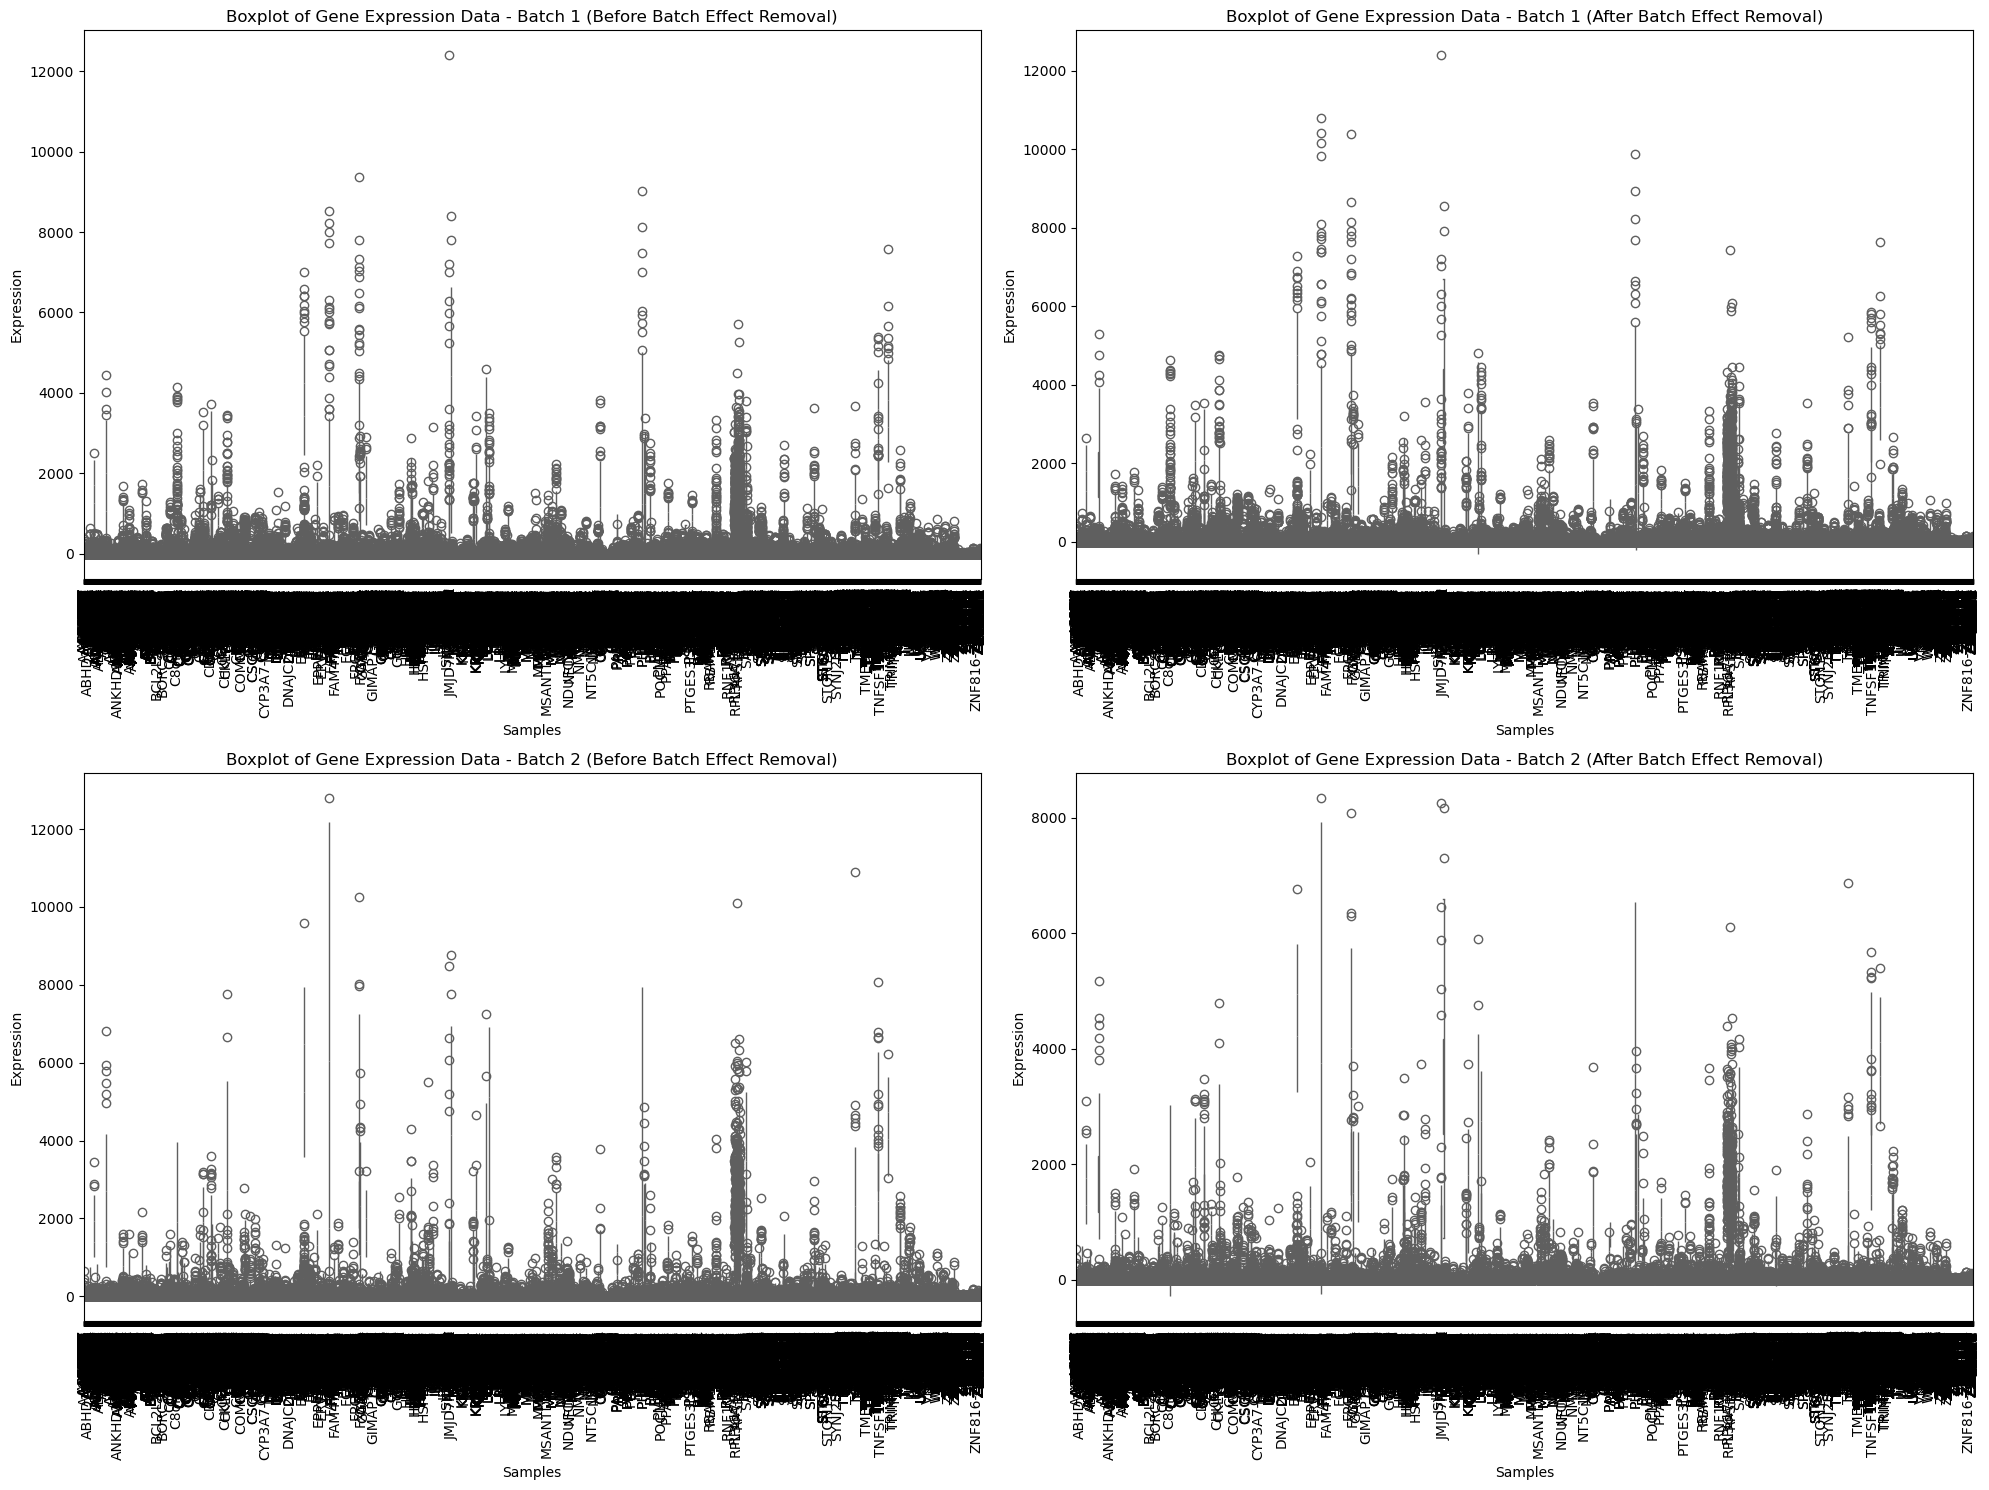

In [8]:
plt.figure(figsize=(20, 15))

# Batch 1 Before
plt.subplot(2, 2, 1)
sns.boxplot(data=batch1_data_before.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 1 (Before Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)

# Batch 1 After
plt.subplot(2, 2, 2)
sns.boxplot(data=batch1_data_after.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 1 (After Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)

# Batch 2 Before
plt.subplot(2, 2, 3)
sns.boxplot(data=batch2_data_before.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 2 (Before Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)

# Batch 2 After
plt.subplot(2, 2, 4)
sns.boxplot(data=batch2_data_after.T, palette="Set3")
plt.title('Boxplot of Gene Expression Data - Batch 2 (After Batch Effect Removal)')
plt.xlabel('Samples')
plt.ylabel('Expression')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

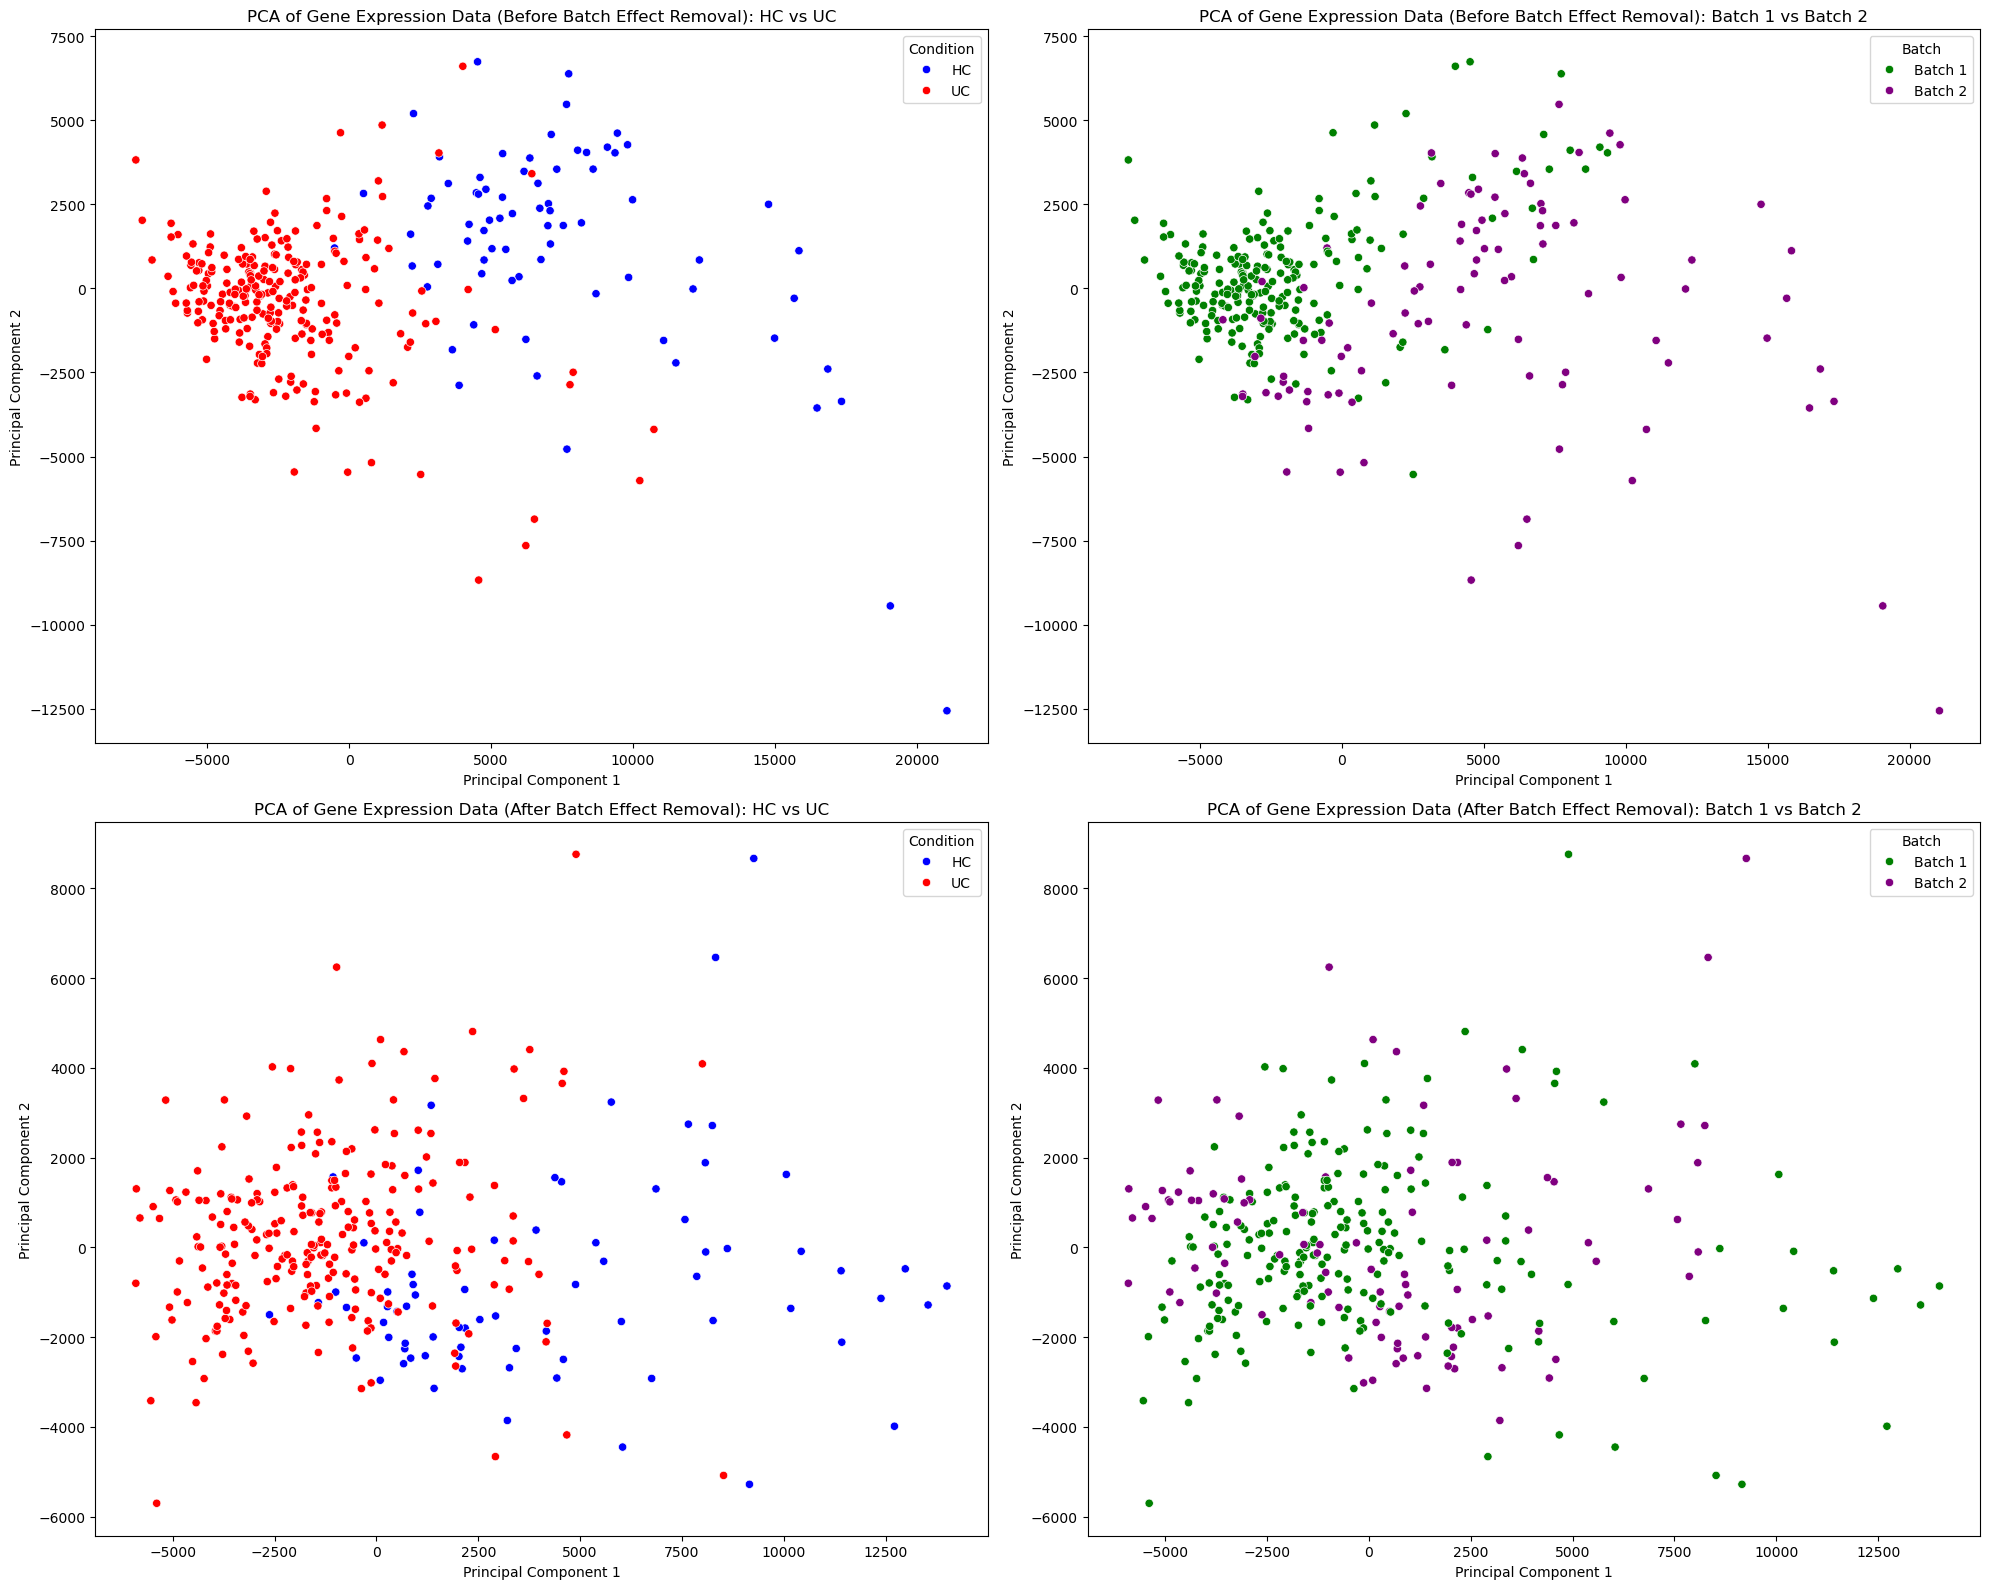

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd

# 原始数据的PCA分析
pca1 = PCA(n_components=2)
pca_result1 = pca1.fit_transform(combined_data.T)
pca_df1 = pd.DataFrame(data=pca_result1, columns=['PC1', 'PC2'])
pca_df1['Sample'] = combined_data.columns
pca_df1['Condition'] = ['HC' if col in hc_columns else 'UC' for col in combined_data.columns]
pca_df1['Batch'] = ['Batch 1' if col.startswith('GSM2') else 'Batch 2' for col in combined_data.columns]

# 移除Batch Effect后的PCA分析
pca2 = PCA(n_components=2)
pca_result2 = pca2.fit_transform(scaled_combined_data.T)
pca_df2 = pd.DataFrame(data=pca_result2, columns=['PC1', 'PC2'])
pca_df2['Sample'] = scaled_combined_data.columns
pca_df2['Condition'] = ['HC' if col in hc_columns else 'UC' for col in scaled_combined_data.columns]
pca_df2['Batch'] = ['Batch 1' if col.startswith('GSM2') else 'Batch 2' for col in scaled_combined_data.columns]

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# HC vs UC
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df1, palette=['blue', 'red'], ax=axes[0, 0])
axes[0, 0].set_title('PCA of Gene Expression Data (Before Batch Effect Removal): HC vs UC')
axes[0, 0].set_xlabel('Principal Component 1')
axes[0, 0].set_ylabel('Principal Component 2')
axes[0, 0].legend(title='Condition')

# Batch 1 vs Batch 2
sns.scatterplot(x='PC1', y='PC2', hue='Batch', data=pca_df1, palette=['green', 'purple'], ax=axes[0, 1])
axes[0, 1].set_title('PCA of Gene Expression Data (Before Batch Effect Removal): Batch 1 vs Batch 2')
axes[0, 1].set_xlabel('Principal Component 1')
axes[0, 1].set_ylabel('Principal Component 2')
axes[0, 1].legend(title='Batch')

# Remove Batch Effect HC vs UC
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df2, palette=['blue', 'red'], ax=axes[1, 0])
axes[1, 0].set_title('PCA of Gene Expression Data (After Batch Effect Removal): HC vs UC')
axes[1, 0].set_xlabel('Principal Component 1')
axes[1, 0].set_ylabel('Principal Component 2')
axes[1, 0].legend(title='Condition')

# Remove Batch Effect Batch 1 vs Batch 2
sns.scatterplot(x='PC1', y='PC2', hue='Batch', data=pca_df2, palette=['green', 'purple'], ax=axes[1, 1])
axes[1, 1].set_title('PCA of Gene Expression Data (After Batch Effect Removal): Batch 1 vs Batch 2')
axes[1, 1].set_xlabel('Principal Component 1')
axes[1, 1].set_ylabel('Principal Component 2')
axes[1, 1].legend(title='Batch')

plt.tight_layout()
plt.show()

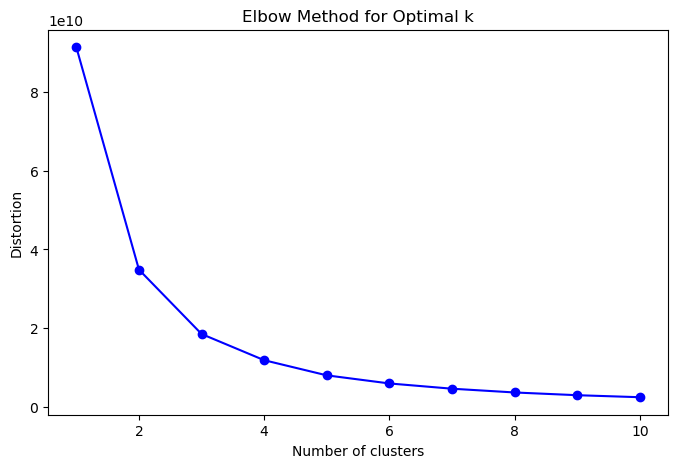

In [10]:
def calculate_distortion(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    return kmeans.inertia_
data_flattened = scaled_combined_data.values.flatten().reshape(-1, 1)

# 失真函数
K_values = range(1, 11)
distortions = [calculate_distortion(data_flattened, k) for k in K_values]
plt.figure(figsize=(8, 5))
plt.plot(K_values, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

Optimal number of clusters: 3


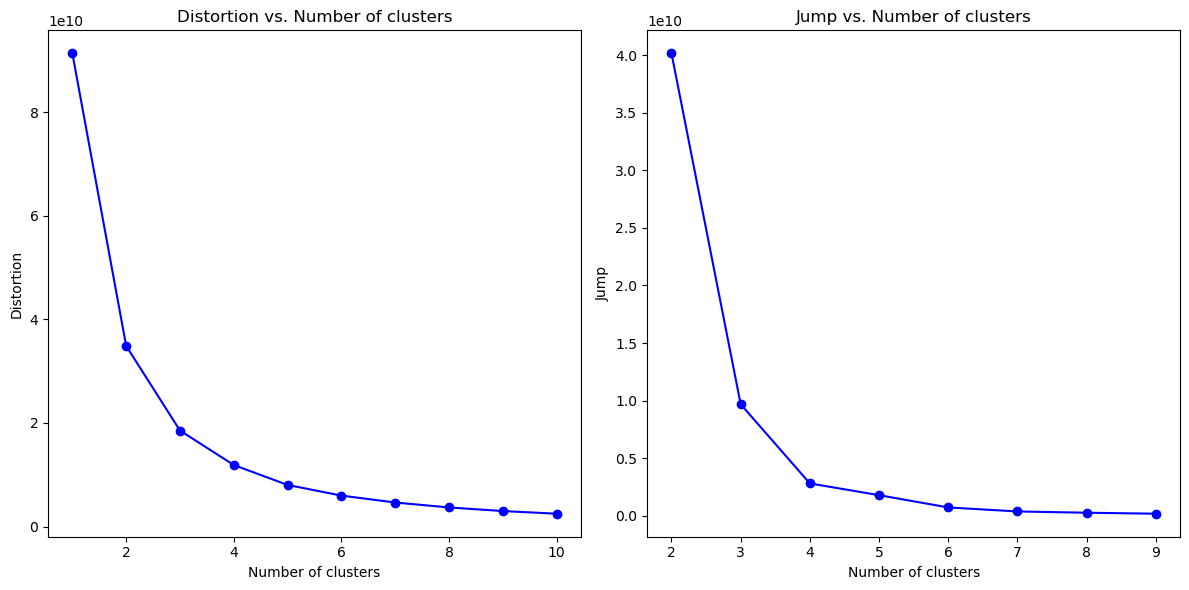

In [11]:
import matplotlib.pyplot as plt
# 失真函数
def calculate_distortion(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    return kmeans.inertia_

# 不同k
K_values = range(1, 11)
distortions = [calculate_distortion(data_flattened, k) for k in K_values]

# Jump
jumps = np.diff(distortions, 2)
optimal_k = np.argmax(jumps) + 3
print(f"Optimal number of clusters: {optimal_k}")

# 绘制失真函数和 Jump 曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_values, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion vs. Number of clusters')

plt.subplot(1, 2, 2)
plt.plot(K_values[1:-1], jumps, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Jump')
plt.title('Jump vs. Number of clusters')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
# K-means silhouette_score
kmeans = KMeans(n_clusters=5, random_state=2000).fit(data_flattened)
cluster_labels = kmeans.labels_
discretized_data = pd.DataFrame(cluster_labels.reshape(scaled_combined_data.shape), 
                                index=scaled_combined_data.index, 
                                columns=scaled_combined_data.columns)

In [13]:
category_counts = pd.Series(cluster_labels).value_counts()
print(category_counts)

0    5065705
4     182243
3      33137
1      10371
2       1984
Name: count, dtype: int64


In [14]:
# 单核用时极长，暂时搁置
'''
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(data_flattened, cluster_labels)
print(f'Silhouette Score: {sil_score}')
'''

"\nfrom sklearn.metrics import silhouette_score\nsil_score = silhouette_score(data_flattened, cluster_labels)\nprint(f'Silhouette Score: {sil_score}')\n"

In [15]:
# 分离UC和HC数据
i2g = pd.read_csv('/Users/martinli/Desktop/SZ/i2g_df_gene_ppion.csv', index_col=0)
i2g_ppion = i2g[i2g['ppion'] == True]
i2g_initial = i2g[i2g['initial'] == True]
gene_names = set(i2g_initial['gene_name'])
discretized_data = discretized_data[discretized_data.index.isin(gene_names)]
discretized_hc_data = discretized_data[hc_columns]
discretized_uc_data = discretized_data[uc_columns]

In [16]:
print(f"Filtered HC data dimensions: {discretized_hc_data.shape}")
print(f"Filtered UC data dimensions: {discretized_uc_data.shape}")

Filtered HC data dimensions: (16542, 74)
Filtered UC data dimensions: (16542, 246)


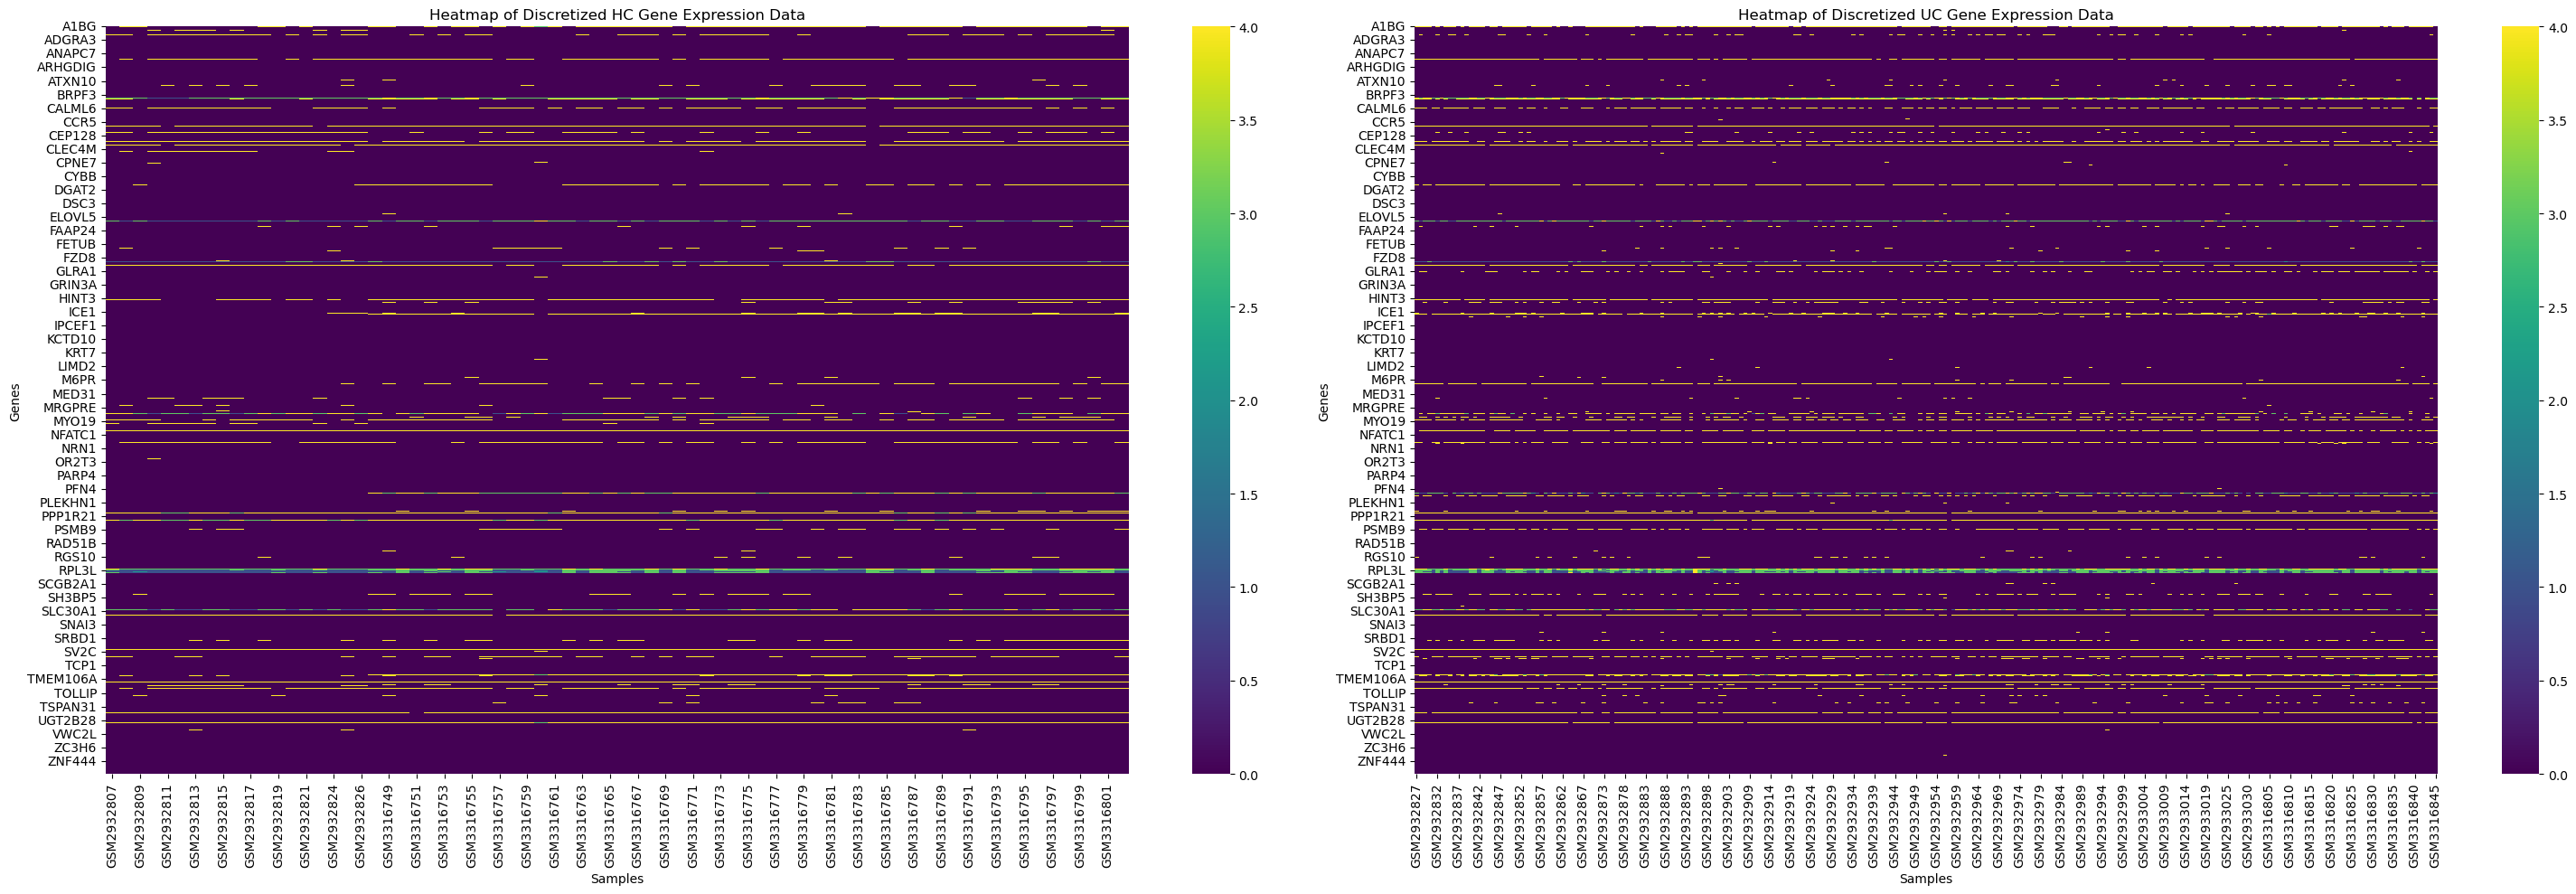

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
# HC热图
sns.heatmap(discretized_hc_data, cmap="viridis", ax=axes[0])
axes[0].set_title('Heatmap of Discretized HC Gene Expression Data')
axes[0].set_xlabel('Samples')
axes[0].set_ylabel('Genes')

# UC热图
sns.heatmap(discretized_uc_data, cmap="viridis", ax=axes[1])
axes[1].set_title('Heatmap of Discretized UC Gene Expression Data')
axes[1].set_xlabel('Samples')
axes[1].set_ylabel('Genes')

plt.tight_layout()
plt.show()

In [18]:
discretized_hc_data.to_csv("/Users/martinli/Desktop/SZ/discretized_hc.csv")
discretized_uc_data.to_csv("/Users/martinli/Desktop/SZ/discretized_uc.csv")

In [19]:
gene_names = set(i2g_ppion['gene_name'])
combined_hc_data = combined_hc_data[combined_hc_data.index.isin(gene_names)]
combined_uc_data = combined_uc_data[combined_uc_data.index.isin(gene_names)]
print(f"Filtered HC data dimensions: {combined_hc_data.shape}")
print(f"Filtered UC data dimensions: {combined_uc_data.shape}")
combined_hc_data.to_csv("/Users/martinli/Desktop/SZ/combined_hc_data_jul25.csv")
combined_uc_data.to_csv("/Users/martinli/Desktop/SZ/combined_uc_data_jul25.csv")
'''
gene_names = set(i2g_initial['gene_name'])
combined_hc_data = combined_hc_data[combined_hc_data.index.isin(gene_names)]
combined_uc_data = combined_uc_data[combined_uc_data.index.isin(gene_names)]
print(f"Filtered HC data dimensions: {combined_hc_data.shape}")
print(f"Filtered UC data dimensions: {combined_uc_data.shape}")
combined_hc_data.to_csv("/Users/martinli/Desktop/SZ/combined_hc_data_jul25.csv")
combined_uc_data.to_csv("/Users/martinli/Desktop/SZ/combined_uc_data_jul25.csv")
'''

Filtered HC data dimensions: (394, 74)
Filtered UC data dimensions: (394, 246)


'\ngene_names = set(i2g_initial[\'gene_name\'])\ncombined_hc_data = combined_hc_data[combined_hc_data.index.isin(gene_names)]\ncombined_uc_data = combined_uc_data[combined_uc_data.index.isin(gene_names)]\nprint(f"Filtered HC data dimensions: {combined_hc_data.shape}")\nprint(f"Filtered UC data dimensions: {combined_uc_data.shape}")\ncombined_hc_data.to_csv("/Users/martinli/Desktop/SZ/combined_hc_data_jul25.csv")\ncombined_uc_data.to_csv("/Users/martinli/Desktop/SZ/combined_uc_data_jul25.csv")\n'

In [20]:
'''
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

hc_samples = combined_hc_data.columns
uc_samples = combined_uc_data.columns
hc_data_transposed = combined_hc_data.T
uc_data_transposed = combined_uc_data.T

pca = PCA(n_components=3)
hc_pca_result = pca.fit_transform(hc_data_transposed)
uc_pca_result = pca.fit_transform(uc_data_transposed)

colors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_samples)))
colors_uc = plt.cm.rainbow(np.linspace(0, 1, len(uc_samples)))

# 获取所有数据的最大和最小值以统一坐标轴范围
all_data = np.concatenate((hc_pca_result, uc_pca_result), axis=0)
x_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()
y_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()

# 绘制HC样本的PCA图
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors_hc):
    plt.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], color=color, label=hc_samples[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('PCA of GEO Data: HC Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

# 绘制UC样本的PCA图
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors_uc):
    plt.scatter(uc_pca_result[i, 0], uc_pca_result[i, 1], color=color, label=uc_samples[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('PCA of GEO Data: UC Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nimport numpy as np\n\nhc_samples = combined_hc_data.columns\nuc_samples = combined_uc_data.columns\nhc_data_transposed = combined_hc_data.T\nuc_data_transposed = combined_uc_data.T\n\npca = PCA(n_components=3)\nhc_pca_result = pca.fit_transform(hc_data_transposed)\nuc_pca_result = pca.fit_transform(uc_data_transposed)\n\ncolors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_samples)))\ncolors_uc = plt.cm.rainbow(np.linspace(0, 1, len(uc_samples)))\n\n# 获取所有数据的最大和最小值以统一坐标轴范围\nall_data = np.concatenate((hc_pca_result, uc_pca_result), axis=0)\nx_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()\ny_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()\n\n# 绘制HC样本的PCA图\nplt.figure(figsize=(10, 6))\nfor i, color in enumerate(colors_hc):\n    plt.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], color=color, label=hc_samples[i])\nplt.xlim(x_min, x_max)\nplt.ylim(y_min, y_max)\nplt.title('PCA of GEO Data: HC Sampl

In [21]:
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

hc_samples = combined_hc_data.columns
uc_samples = combined_uc_data.columns
hc_data_transposed = combined_hc_data.T
uc_data_transposed = combined_uc_data.T
pca = PCA(n_components=3)
hc_pca_result = pca.fit_transform(hc_data_transposed)
uc_pca_result = pca.fit_transform(uc_data_transposed)

# HC三维PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_data_transposed)))

for i, color in enumerate(colors_hc):
    ax.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], hc_pca_result[i, 2], color=color, label=hc_samples[i])
ax.set_title('3D PCA of GEO Data: HC Samples')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

# UC三维PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors_uc = plt.cm.rainbow(np.linspace(0, 1, len(uc_data_transposed)))

for i, color in enumerate(colors_uc):
    ax.scatter(uc_pca_result[i, 0], uc_pca_result[i, 1], uc_pca_result[i, 2], color=color, label=uc_samples[i])
ax.set_title('3D PCA of GEO Data: UC Samples')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()
'''

"\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nimport numpy as np\nfrom mpl_toolkits.mplot3d import Axes3D\n\nhc_samples = combined_hc_data.columns\nuc_samples = combined_uc_data.columns\nhc_data_transposed = combined_hc_data.T\nuc_data_transposed = combined_uc_data.T\npca = PCA(n_components=3)\nhc_pca_result = pca.fit_transform(hc_data_transposed)\nuc_pca_result = pca.fit_transform(uc_data_transposed)\n\n# HC三维PCA\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection='3d')\ncolors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_data_transposed)))\n\nfor i, color in enumerate(colors_hc):\n    ax.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], hc_pca_result[i, 2], color=color, label=hc_samples[i])\nax.set_title('3D PCA of GEO Data: HC Samples')\nax.set_xlabel('Principal Component 1')\nax.set_ylabel('Principal Component 2')\nax.set_zlabel('Principal Component 3')\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fon

In [22]:
'''
# Z-score
import pandas as pd
import numpy as np
combined_hc_data = combined_hc_data.astype(float)
combined_uc_data = combined_uc_data.astype(float)

#Z-score
hc_zscore_data = combined_hc_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
uc_zscore_data = combined_uc_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
hc_zscore_data.replace([np.inf, -np.inf], np.nan, inplace=True)
uc_zscore_data.replace([np.inf, -np.inf], np.nan, inplace=True)
hc_zscore_data_cleaned = hc_zscore_data.dropna()
uc_zscore_data_cleaned = uc_zscore_data.dropna()
'''

'\n# Z-score\nimport pandas as pd\nimport numpy as np\ncombined_hc_data = combined_hc_data.astype(float)\ncombined_uc_data = combined_uc_data.astype(float)\n\n#Z-score\nhc_zscore_data = combined_hc_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1)\nuc_zscore_data = combined_uc_data.apply(lambda x: (x - x.mean()) / x.std(), axis=1)\nhc_zscore_data.replace([np.inf, -np.inf], np.nan, inplace=True)\nuc_zscore_data.replace([np.inf, -np.inf], np.nan, inplace=True)\nhc_zscore_data_cleaned = hc_zscore_data.dropna()\nuc_zscore_data_cleaned = uc_zscore_data.dropna()\n'

In [23]:
'''
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Transpose data for PCA
hc_data_transposed = hc_zscore_data_cleaned.T
uc_data_transposed = uc_zscore_data_cleaned.T

# Perform PCA
pca = PCA(n_components=2)
hc_pca_result = pca.fit_transform(hc_data_transposed)
uc_pca_result = pca.fit_transform(uc_data_transposed)

# Get the min and max values for setting consistent plot scales
all_data = np.concatenate((hc_pca_result, uc_pca_result), axis=0)
x_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()
y_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()

# Plot PCA results for HC samples
colors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_samples)))
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors_hc):
    plt.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], color=color, label=hc_samples[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('PCA of GEO Data: HC Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()

# Plot PCA results for UC samples
colors_uc = plt.cm.rainbow(np.linspace(0, 1, len(uc_samples)))
plt.figure(figsize=(10, 6))
for i, color in enumerate(colors_uc):
    plt.scatter(uc_pca_result[i, 0], uc_pca_result[i, 1], color=color, label=uc_samples[i])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('PCA of GEO Data: UC Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nimport numpy as np\n\n# Transpose data for PCA\nhc_data_transposed = hc_zscore_data_cleaned.T\nuc_data_transposed = uc_zscore_data_cleaned.T\n\n# Perform PCA\npca = PCA(n_components=2)\nhc_pca_result = pca.fit_transform(hc_data_transposed)\nuc_pca_result = pca.fit_transform(uc_data_transposed)\n\n# Get the min and max values for setting consistent plot scales\nall_data = np.concatenate((hc_pca_result, uc_pca_result), axis=0)\nx_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()\ny_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()\n\n# Plot PCA results for HC samples\ncolors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_samples)))\nplt.figure(figsize=(10, 6))\nfor i, color in enumerate(colors_hc):\n    plt.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], color=color, label=hc_samples[i])\nplt.xlim(x_min, x_max)\nplt.ylim(y_min, y_max)\nplt.title('PCA of GEO Data: HC Samples')\nplt.xlabel('Principal Com

In [24]:
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

hc_samples = hc_zscore_data_cleaned.columns
uc_samples = uc_zscore_data_cleaned.columns
hc_data_transposed = hc_zscore_data_cleaned.T
uc_data_transposed = uc_zscore_data_cleaned.T
pca = PCA(n_components=3)
hc_pca_result = pca.fit_transform(hc_data_transposed)
uc_pca_result = pca.fit_transform(uc_data_transposed)

# HC三维PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_data_transposed)))

for i, color in enumerate(colors_hc):
    ax.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], hc_pca_result[i, 2], color=color, label=hc_samples[i])
ax.set_title('3D PCA of GEO Data: HC Samples')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

# UC三维PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors_uc = plt.cm.rainbow(np.linspace(0, 1, len(uc_data_transposed)))

for i, color in enumerate(colors_uc):
    ax.scatter(uc_pca_result[i, 0], uc_pca_result[i, 1], uc_pca_result[i, 2], color=color, label=uc_samples[i])
ax.set_title('3D PCA of GEO Data: UC Samples')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()
'''

"\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\nimport numpy as np\nfrom mpl_toolkits.mplot3d import Axes3D\n\nhc_samples = hc_zscore_data_cleaned.columns\nuc_samples = uc_zscore_data_cleaned.columns\nhc_data_transposed = hc_zscore_data_cleaned.T\nuc_data_transposed = uc_zscore_data_cleaned.T\npca = PCA(n_components=3)\nhc_pca_result = pca.fit_transform(hc_data_transposed)\nuc_pca_result = pca.fit_transform(uc_data_transposed)\n\n# HC三维PCA\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection='3d')\ncolors_hc = plt.cm.rainbow(np.linspace(0, 1, len(hc_data_transposed)))\n\nfor i, color in enumerate(colors_hc):\n    ax.scatter(hc_pca_result[i, 0], hc_pca_result[i, 1], hc_pca_result[i, 2], color=color, label=hc_samples[i])\nax.set_title('3D PCA of GEO Data: HC Samples')\nax.set_xlabel('Principal Component 1')\nax.set_ylabel('Principal Component 2')\nax.set_zlabel('Principal Component 3')\nplt.legend(bbox_to_anchor=(1.05, 1

In [25]:
'''
# 对数变换
combined_hc_data_log = np.log2(hc_zscore_data_cleaned + 1)
combined_uc_data_log = np.log2(uc_zscore_data_cleaned + 1)
vmin = min(combined_hc_data_log.min().min(), combined_uc_data_log.min().min())
vmax = max(combined_hc_data_log.max().max(), combined_uc_data_log.max().max())
# HC
plt.figure(figsize=(12, 10))
sns.heatmap(combined_hc_data_log, cmap='RdBu_r', xticklabels=False, yticklabels=False, vmin=vmin, vmax=vmax)
plt.title('Heatmap of GEO Data: HC Samples (Log2 Transformed)')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()
# UC
plt.figure(figsize=(12, 10))
sns.heatmap(combined_uc_data_log, cmap='RdBu_r', xticklabels=False, yticklabels=False, vmin=vmin, vmax=vmax)
plt.title('Heatmap of GEO Data: UC Samples (Log2 Transformed)')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()
'''

"\n# 对数变换\ncombined_hc_data_log = np.log2(hc_zscore_data_cleaned + 1)\ncombined_uc_data_log = np.log2(uc_zscore_data_cleaned + 1)\nvmin = min(combined_hc_data_log.min().min(), combined_uc_data_log.min().min())\nvmax = max(combined_hc_data_log.max().max(), combined_uc_data_log.max().max())\n# HC\nplt.figure(figsize=(12, 10))\nsns.heatmap(combined_hc_data_log, cmap='RdBu_r', xticklabels=False, yticklabels=False, vmin=vmin, vmax=vmax)\nplt.title('Heatmap of GEO Data: HC Samples (Log2 Transformed)')\nplt.xlabel('Samples')\nplt.ylabel('Genes')\nplt.show()\n# UC\nplt.figure(figsize=(12, 10))\nsns.heatmap(combined_uc_data_log, cmap='RdBu_r', xticklabels=False, yticklabels=False, vmin=vmin, vmax=vmax)\nplt.title('Heatmap of GEO Data: UC Samples (Log2 Transformed)')\nplt.xlabel('Samples')\nplt.ylabel('Genes')\nplt.show()\n"